In [1]:
import os
os.environ['IPYTHON_SUPPRESS_DEPRECATED_CONFIGS'] = '1'
from google.colab import drive

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates


import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Step 2: Dataset Loading & Preprocessing

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Update the route to access the data:
route = '/content/drive/Shared drives/Capstone/Dataset_cleaned_merged/df_final_version.csv'
destination = '/content/drive/Shared drives/Capstone/Dataset_cleaned_merged'

In [5]:
# Path to the CSV file
file_path = route

# Read the CSV file into a DataFrame
orders = pd.read_csv(file_path)

orders.head(5)

,id_orden,id_producto,incluido_orden_carrito,reordenado,nombre_producto,id_pasillo,id_departamento,pasillo,departamento,incluido_orden_carrito_normalized,pasillo_encoded,departamento_encoded,pasillo_ACCESORIOS PARA BEBÉS,pasillo_ACEITES VINAGRES,pasillo_ACEITUNAS ENCURTIDAS BIENES,pasillo_ADEREZOS PARA ENSALADAS Y CONDIMENTOS,pasillo_ALERGIAS GRIPE,pasillo_ALIMENTOS DE LA INDIA,pasillo_ALIMENTOS INSTANTÁNEOS,pasillo_ALIMENTOS KOSHER,pasillo_ALIMENTOS LATINOS,pasillo_ALIVIO DEL DOLOR,pasillo_ALMACENAMIENTO DE ALIMENTOS,pasillo_ALTERNATIVAS DE CARNE TOFU,pasillo_AMBIENTADORES Y VELAS,pasillo_APERITIVOS CONGELADOS,pasillo_ARROCES Y OTROS,pasillo_ARTÍCULOS DE PAPEL,pasillo_AVES DE CORRAL,pasillo_AVES DE CORRAL ENVASADAS,pasillo_BARRAS DE GRANOLA DE ENERGÍA,pasillo_BEBIDAS DEPORTIVAS ENERGETICAS,pasillo_BEBIDAS ESPIRITUOSAS,pasillo_BEBIDAS SIN ALCOHOL,pasillo_BEBIDAS VEGETALES Y SIN LACTOSA,pasillo_BELLEZA,pasillo_BOCADILLOS FRUTAS VEGETALES,pasillo_BOLLOS ROLLOS,pasillo_BOLSAS DE BASURA REVESTIMIENTOS,pasillo_CAFÉ,pasillo_CARNE DE ALMUERZO,pasillo_CARNE ENVASADA,pasillo_CEREAL,pasillo_CERVEZAS REFRIGERADORES,pasillo_CHICLES Y OTROS DULCES,pasillo_CHIPS DE GALLETAS SALADAS,pasillo_COMIDA CONGELADA,pasillo_COMIDA PARA GATOS,pasillo_COMIDA PARA PERROS,pasillo_COMIDAS ASIÁTICAS,pasillo_COMIDAS ENLATADAS JUDÍAS,pasillo_COMIDAS PREPARADAS,pasillo_CONDIMENTOS,pasillo_CREMA,pasillo_CUBIERTAS PARA HELADOS,pasillo_CUIDADO DE OÍDO Y OJOS,pasillo_CUIDADO DEL CABELLO,pasillo_CUIDADO FACIAL,pasillo_CUIDADO FEMENINO,pasillo_DESAYUNOS CONGELADOS,pasillo_DESODORANTES,pasillo_DETERGENTES PARA PLATOS,pasillo_DIFERENCIALES,pasillo_DIGESTIÓN,pasillo_DULCES Y CHOCOLATES,pasillo_ENVASADOS ​​DE FRUTAS Y VEGETALES,pasillo_ESPECIALIDAD DE VINOS CAVAS,pasillo_ESPECIAS CONDIMENTOS,pasillo_FRUTA SEMILLAS FRUTOS SECOS,pasillo_FRUTAS FRESCAS,pasillo_FRUTOS SECOS A GRANEL FRUTAS VERDURAS,pasillo_FÓRMULA COMIDA DE BEBÉ,pasillo_GALLETAS,pasillo_GALLETAS PASTELES,pasillo_GRANOLA,pasillo_GRANOS A GRANEL,pasillo_HELADOS,pasillo_HIERBAS FRESCAS,pasillo_HIGIENE ORAL,pasillo_HUEVOS,pasillo_INGREDIENTES PARA HORNEAR,pasillo_JABÓN,pasillo_JUGO CONGELADO,pasillo_LAVANDERÍA,pasillo_LECHES,pasillo_LOCIONES DE JABÓN PARA EL CUERPO,pasillo_MANTECA,pasillo_MARISCOS,pasillo_MARISCOS CARNE CONGELADA,pasillo_MARISCOS CARNE ENLATADA,pasillo_MARISCOS ENVASADOS,pasillo_MEZCLA DE APERITIVOS MEZCLA DE FRUTOS SECOS,pasillo_MEZCLAS DE BEBIDAS DE CACAO,pasillo_MEZCLAS PARA TORTITAS DE CEREALES,pasillo_MIELES JARABES NÉCTARES,pasillo_MOSTRADOR DE CARNE,pasillo_MÁS HOGARES,pasillo_NECESIDADES DEL AFEITADO,pasillo_NÉCTARES DE JUGO,pasillo_OTROS,pasillo_OTROS QUESOS CREMAS,pasillo_PALOMITAS,pasillo_PAN DE MOLDE,pasillo_PAN Y TORTILLAS,pasillo_PANADERÍA DESAYUNO,pasillo_PANES MASAS CONGELADAS,pasillo_PASTA FRESCA,pasillo_PASTAS GELATINAS HORNEAR MEZCLAS,pasillo_PASTAS SECAS,pasillo_PASTELERÍA PARA DESAYUNO,pasillo_PAÑALES TOALLITAS,pasillo_PERROS CALIENTES TOCINO SALCHICHAS,pasillo_PIZZAS CONGELADAS,pasillo_PLACAS CUENCOS TAZAS CUBIERTOS,pasillo_POSTRE CONGELADO,pasillo_POSTRES DE PANADERÍA,pasillo_POSTRES REFRIGERADOS PUDÍN,pasillo_PREPARACIÓN DE LA CARNE MARINADOS,pasillo_PRIMEROS AUXILIOS,pasillo_PRODUCTOS CONGELADOS,pasillo_PRODUCTOS DE BAÑO PARA BEBÉ Y CUIDADO DEL CUERPO,pasillo_PRODUCTOS DE LIMPIEZA,pasillo_PRODUCTOS ENVASADOS,pasillo_PROTECCIÓN DE LA PIEL,pasillo_PURÉ DE MANZANA Y FRUTAS ENLATADAS,pasillo_QUESOS DE ESPECIALIDAD,pasillo_QUESOS ENVASADOS,pasillo_REFRIGERADOS,pasillo_SALSA PARA PASTA,pasillo_SALSAS EN CONSERVA PARA UNTAR,pasillo_SALSAS FRESCAS TAPENADES,pasillo_SELTZER AGUA Y AGUA CON GAS,pasillo_SIN CLASFICAR,pasillo_SOPAS PREPARADAS ENSALADAS,pasillo_SOPAS Y CALDOS,pasillo_SUMINISTROS PARA HORNEAR Y DECORACIÓN,pasillo_SUPLEMENTOS DE VITAMINAS,pasillo_SUSTITUTOS DE ALIMENTOS DE PROTEÍNAS,pasillo_TÉ,pasillo_UTENSILIOS DE COCINA,pasillo_VEGETALES FRESCOS,pasillo_VEGETARIANA VEGANA CONGELADA,pasillo_VERDURAS EN CONSERVA Y EN FRASCOS,pasillo_VINOS BLANCOS,pasillo_VINOS TINTOS

# Step 3:  Develop vector for vectorization

In [6]:
orders['vector_words'] = orders['nombre_producto'] +' '+  orders['pasillo'] + ' ' + orders['departamento']

In [7]:

# Agrupamos por 'id_order' y concatenamos los valores de 'vector_words'
grouped_orders = orders.groupby('id_orden')['vector_words'].apply(lambda x: '|'.join(x)).reset_index()

# Mostramos el resultado
print(grouped_orders)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
#reduce the dataset for the sake of coding/performance

orders_reduced = grouped_orders.head(10000)


# Step 4: Vectorization (TF-IDF)

In [9]:
# Vectoriza los documentos usando TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(orders_reduced['vector_words'])

In [10]:
tfidf_matrix

<10000x7129 sparse matrix of type '<class 'numpy.float64'>'
	with 537828 stored elements in Compressed Sparse Row format>

In [12]:
# Para ver la forma de la matriz (número de documentos, número de términos)
print("Forma de la matriz TF-IDF:", tfidf_matrix.shape)

Forma de la matriz TF-IDF: (10000, 7129)


In [15]:
tfidf_matrix.dtype()

TypeError: 'numpy.dtypes.Float64DType' object is not callable

# Step 5: Cosine similarity

In [ ]:
# Calcula la similitud de coseno entre todas las ordenes
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
# Imprime la matriz de similitud de coseno
print("Matriz de similitud de coseno:")
print(cosine_similarities)

Matriz de similitud de coseno:
[[1.         0.24712844 0.17854661 ... 0.33919606 0.33564623 0.31178241]
 [0.24712844 1.         0.17963837 ... 0.23042536 0.39360894 0.34028717]
 [0.17854661 0.17963837 1.         ... 0.35498782 0.38126552 0.39851856]
 ...
 [0.33919606 0.23042536 0.35498782 ... 1.         0.49233575 0.41783046]
 [0.33564623 0.39360894 0.38126552 ... 0.49233575 1.         0.46916573]
 [0.31178241 0.34028717 0.39851856 ... 0.41783046 0.46916573 1.        ]]


# Step 6: Find most similar order through cosine similarity

In [ ]:
# Func to find the most similar order consiering "x" order
def find_similar_order(cosine_similarities, doc_index):
    # Exclude form similarity the same order
    similitudes = cosine_similarities[doc_index]
    # Ignores the velue of similarity with the order iself coding to -1
    similitudes[doc_index] = -1
    # Finds the order with most similarity
    index_max_similitud = np.argmax(similitudes)
    return index_max_similitud, similitudes[index_max_similitud]

In [ ]:
# Crear un nuevo dataframe con el índice y la columna 'nombre_producto'
orders_reduced_with_index = orders_reduced.reset_index()[['index', 'id_orden']]

# Mostrar el nuevo dataframe
print(orders_reduced_with_index)

      index  id_orden
0         0         1
1         1        36
2         2        38
3         3        96
4         4        98
5         5       112
6         6       170
7         7       218
8         8       226
9         9       349
10       10       393
11       11       456
12       12       473
13       13       631
14       14       719
15       15       762
16       16       774
17       17       844
18       18       878
19       19       904
20       20       915
21       21       988
22       22      1001
23       23      1032
24       24      1042
25       25      1077
26       26      1086
27       27      1119
28       28      1120
29       29      1139
30       30      1143
31       31      1145
32       32      1275
33       33      1280
34       34      1318
35       35      1325
36       36      1335
37       37      1342
38       38      1350
39       39      1468
40       40      1571
41       41      1572
42       42      1579
43       43      1591
44       4

In [ ]:
# Example: Find the most similar order through the index

doc_index = 25 # aca hay que poner el index que queremos identificar con el similar

index_mas_similar, similitud = find_similar_order(cosine_similarities, doc_index)
item_similarity_input = orders_reduced_with_index['id_orden'].iloc[doc_index]
item_similarity_output = orders_reduced_with_index['id_orden'].iloc[index_mas_similar]
print(f'The order most similar to the order {item_similarity_input} is the order {item_similarity_output} with a similarity of {similitud}')

The order most similar to the order 1077 is the order 59018 with a similarity of 0.8223623450446802


In [ ]:
# Filtrar los nombres de los productos para cada ID de orden
productos_input = orders['nombre_producto'][orders['id_orden'] == item_similarity_input]
productos_output = orders['nombre_producto'][orders['id_orden'] == item_similarity_output]

# Encontrar los productos que están en la salida pero no en la entrada
productos_exclusivos_output = productos_output[~productos_output.isin(productos_input)]

# Desplegar los nombres de los productos exclusivos de la orden de salida
productos_exclusivos_output

24359                           MANZANAS
24360                         FRAMBUESAS
24363          100% NATURAL SPRING WATER
24364            LOS ARÁNDANOS ORGÁNICOS
24366          LAS MANZANAS GRANNY SMITH
24367          AGUA NATURAL DE MANANTIAL
24368    2% ORGÁNICO CHOCOLATE CON LECHE
Name: nombre_producto, dtype: object

In [ ]:
data = []

for doc_index in range(1, 999):
    index_mas_similar, similitud = find_similar_order(cosine_similarities, doc_index)
    order_similarity_input = orders_reduced_with_index['id_orden'].iloc[doc_index]
    orderr_similarity_output = orders_reduced_with_index['id_orden'].iloc[index_mas_similar]
    data.append({
        'doc_index': doc_index,
        'order_similarity_input': order_similarity_input,
        'order_similarity_output': order_similarity_output,
        'similitud': similitud
    })

# Crear el DataFrame
df = pd.DataFrame(data)

In [ ]:
df.sort_values(by = 'similitud', ascending = False)

,doc_index,item_similarity_input,item_similarity_output,similitud
396,397,10287,8616,1.000000
795,796,20333,237435,1.000000
938,939,24112,251077,1.000000
645,646,17010,253185,1.000000
92,93,3176,20569,1.000000
978,979,25162,20079,1.000000
778,779,20076,59714,1.000000
192,193,4935,164285,1.000000
594,595,15462,59410,1.000000
779,780,20079,25162,1.000000


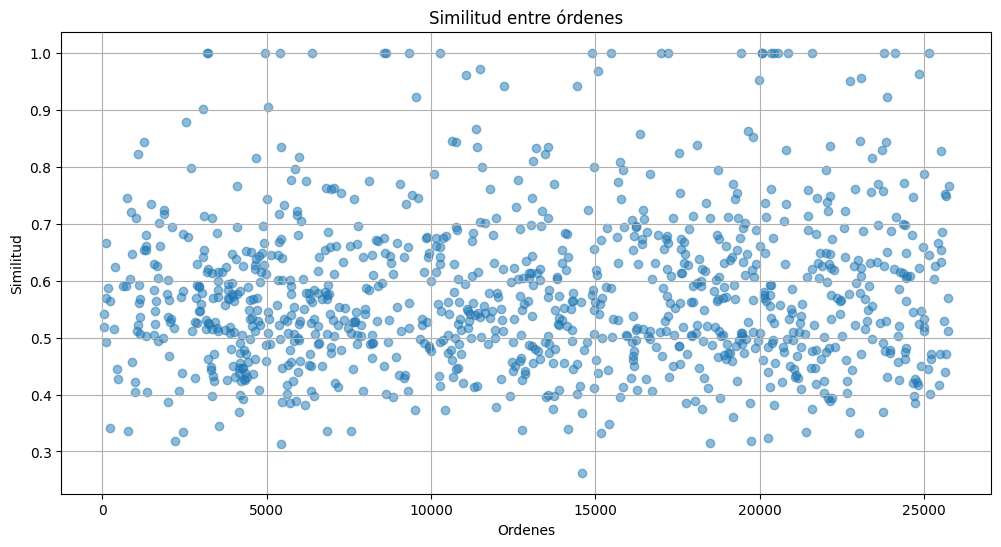

In [ ]:
# Graficar
plt.figure(figsize=(12, 6))
plt.scatter(df['item_similarity_input'], df['similitud'], alpha=0.5)
plt.xlabel('Ordenes')
plt.ylabel('Similitud')
plt.title('Similitud entre órdenes')
plt.grid(True)
plt.show()